In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/happiness-index/2023_SouthAsia_MiddleEast_Happiness_Education_Income.csv
/kaggle/input/sa-me-happiness-index/2023_SouthAsia_MiddleEast_Happiness_Education_Income.csv


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from scipy.stats import skew

In [51]:
import pandas as pd
df = pd.read_csv(
    "/kaggle/input/sa-me-happiness-index/"
    "2023_SouthAsia_MiddleEast_Happiness_Education_Income.csv"
)
df.columns = df.columns.str.strip() #stripping white spaces
df.head()


,Country,Region,Happiness_Score,GDP_per_Capita_USD,Social_Support,Literacy_Rate(%),Offline_School_Enrollment(%),Online_Education_Access(%),Median_Income_USD,Unemployment_Rate(%),Poverty_Rate(%)
0,India,South Asia,4.036,2450.0,0.797,77.7,73.2,22.5,2340.0,7.6,18.7
1,Pakistan,South Asia,4.516,1590.0,0.708,60.7,63.5,11.8,1560.0,6.5,21.9
2,Bangladesh,South Asia,5.155,2680.0,0.745,75.2,77.1,15.3,2550.0,4.1,14.8
3,Nepal,South Asia,5.269,1380.0,0.731,68.5,66.0,10.4,1300.0,4.3,15.1
4,Sri Lanka,South Asia,4.325,3350.0,0.832,92.3,97.6,18.9,3100.0,5.8,25.6


In [52]:
country = df['Country']

In [53]:
def InitialParams(df):
    print(f"\n SHAPE IS: {df.shape}")
    print(f"\n COLUMNS IN THE DATASET ARE: \n {df.columns}")
    print(f"\n DATATYPES: \n {df.dtypes}")
    print(f"\n NULL VALUES ARE: {df.isnull().sum()}")
    print(f"\n STATISTICAL PARAMETERS ARE: \n {df.describe()}")

#Checking for the initial basic parameters of the dataset
InitialParams(df)


 SHAPE IS: (14, 11)

 COLUMNS IN THE DATASET ARE: 
 Index(['Country', 'Region', 'Happiness_Score', 'GDP_per_Capita_USD',
       'Social_Support', 'Literacy_Rate(%)', 'Offline_School_Enrollment(%)',
       'Online_Education_Access(%)', 'Median_Income_USD',
       'Unemployment_Rate(%)', 'Poverty_Rate(%)'],
      dtype='object')

 DATATYPES: 
 Country                          object
Region                           object
Happiness_Score                 float64
GDP_per_Capita_USD              float64
Social_Support                  float64
Literacy_Rate(%)                float64
Offline_School_Enrollment(%)    float64
Online_Education_Access(%)      float64
Median_Income_USD               float64
Unemployment_Rate(%)            float64
Poverty_Rate(%)                 float64
dtype: object

 NULL VALUES ARE: Country                         0
Region                          0
Happiness_Score                 0
GDP_per_Capita_USD              2
Social_Support                  0
Literacy_Rat

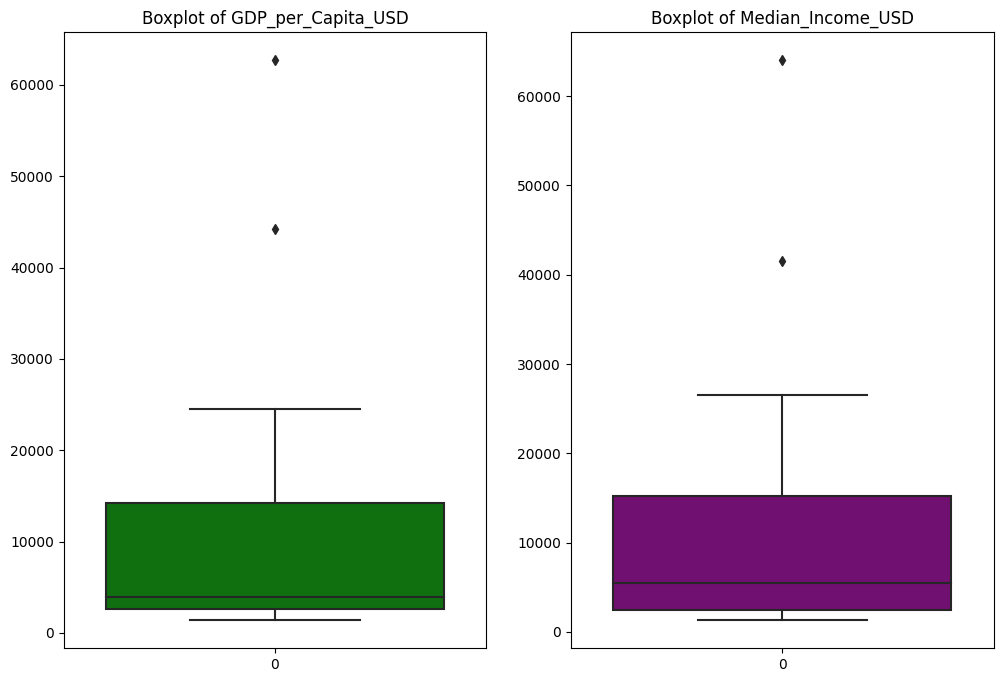

In [54]:
#Checking for Outliers in the columns with NULL values
col1 = 'GDP_per_Capita_USD'
col2 = 'Median_Income_USD'

fig,axes = plt.subplots(1,2,figsize=(12,8)) # 1 row, 2 columns
#fig1
sns.boxplot(data = df['GDP_per_Capita_USD'],ax = axes[0],color='green')
axes[0].set_title(f"Boxplot of {col1}")
#fig2
sns.boxplot(data = df['Median_Income_USD'],ax = axes[1], color='purple')
axes[1].set_title(f"Boxplot of {col2}")

plt.show()

## **Pipeline**

In [60]:
numeric_columns = df.select_dtypes(include = ['number']).columns
pipeline = Pipeline([('imputer',SimpleImputer(strategy = 'median')),('scaler',MinMaxScaler())])
df_processed = pipeline.fit_transform(df[numeric_columns])
df_num = pd.DataFrame(df_processed, columns = numeric_columns, index = df.index)
df_num.isnull().sum()


Happiness_Score                 0
GDP_per_Capita_USD              0
Social_Support                  0
Literacy_Rate(%)                0
Offline_School_Enrollment(%)    0
Online_Education_Access(%)      0
Median_Income_USD               0
Unemployment_Rate(%)            0
Poverty_Rate(%)                 0
dtype: int64

In [61]:
df = pd.concat([country,df_num],axis = 1).sort_values(by = 'Happiness_Score')
df.head()

,Country,Happiness_Score,GDP_per_Capita_USD,Social_Support,Literacy_Rate(%),Offline_School_Enrollment(%),Online_Education_Access(%),Median_Income_USD,Unemployment_Rate(%),Poverty_Rate(%)
5,Afghanistan,0.000000,0.041504,0.012563,0.000000,0.000000,0.000000,0.066986,0.373770,1.000000
13,Lebanon,0.382603,0.041504,0.000000,0.950083,0.646388,0.629944,0.066986,1.000000,0.535519
0,India,0.462994,0.017449,0.716080,0.658902,0.536122,0.556497,0.016587,0.232787,0.338798
4,Sri Lanka,0.524458,0.032127,0.804020,0.901830,1.000000,0.454802,0.028708,0.173770,0.464481
9,Iraq,0.542748,0.064742,0.444724,0.705491,0.617871,0.279661,0.062201,0.426230,0.331512


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


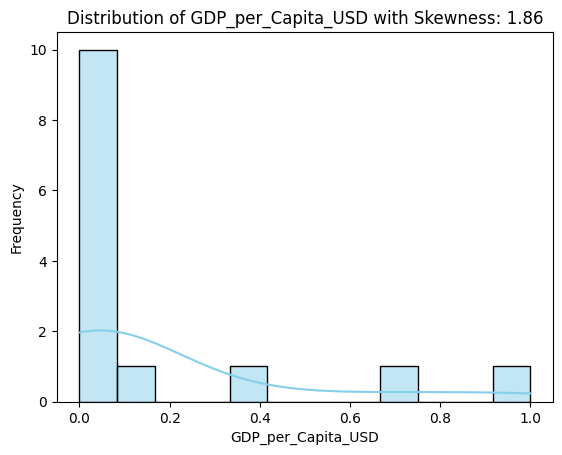

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


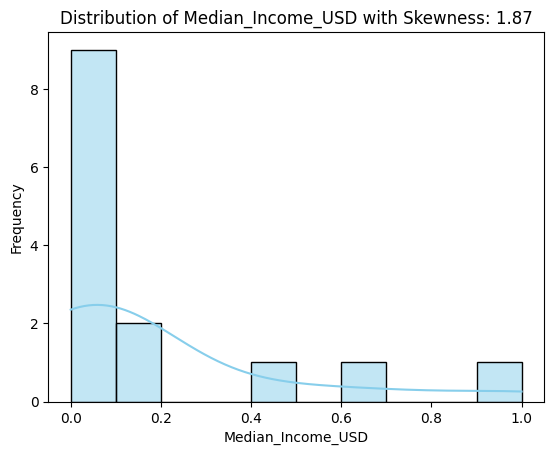

In [62]:
col1 = 'GDP_per_Capita_USD'
col2 = 'Median_Income_USD'

sns.histplot(df[col1], kde=True, color='skyblue')
plt.title(f'Distribution of {col1} with Skewness: {skew(df[col1]):.2f}')
plt.xlabel(col1)
plt.ylabel('Frequency')
plt.show()

sns.histplot(df[col2], kde=True, color='skyblue')
plt.title(f'Distribution of {col2} with Skewness: {skew(df[col2]):.2f}')
plt.xlabel(col2)
plt.ylabel('Frequency')
plt.show()

***GDP_per_capita and Median_Income are positively skewed.***

***In a positively skewed distribution, also known as a right-skewed distribution, most data points cluster towards the lower end of the scale, with a longer tail stretching towards the higher values. This means the mean (average) will be greater than the median, and the mode (most frequent value) will be to the left of the median.***

***Mean > Median > Mode: The mean is pulled towards the higher values by the extreme data points, making it greater than the median and mode.*** 

## **Correlation Heatmap analysis**

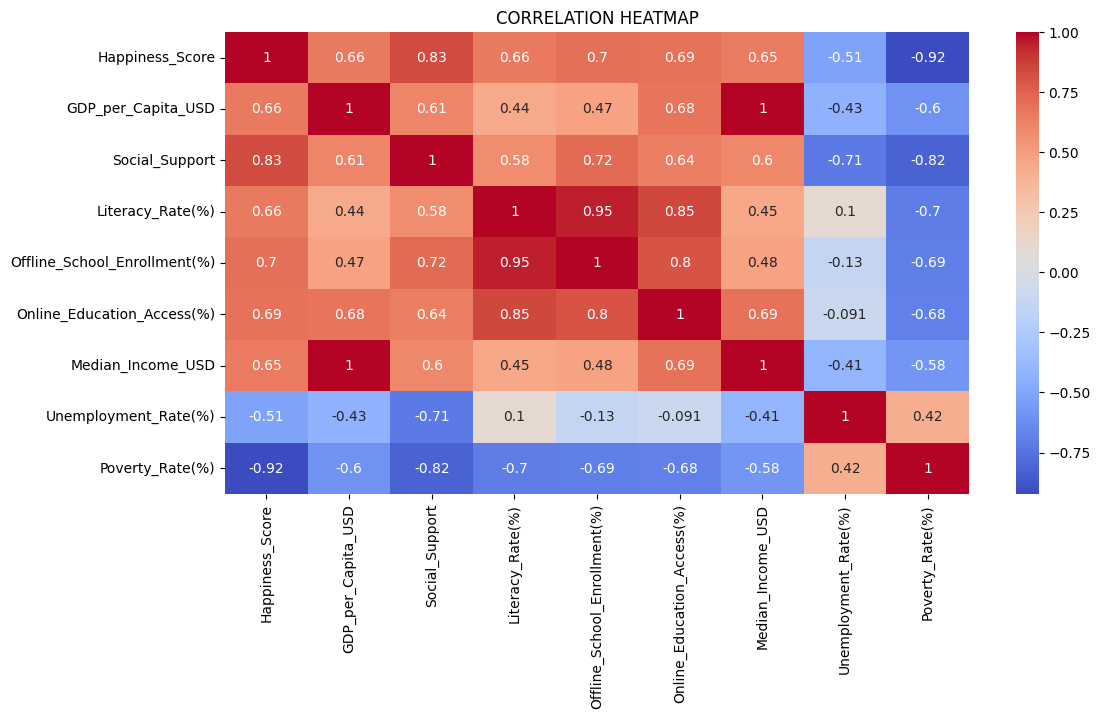

In [41]:
corr = df_num.corr()
plt.figure(figsize = (12,6))
sns.heatmap(corr,annot = True, cmap = 'coolwarm')
plt.title('CORRELATION HEATMAP')
plt.show()

Happiness Score is highly correlated with Social_Support **[0.83]**, Offline_School_Enrollment(%) **[0.7]**, Online_Education_Access(%) **[0.69]**,GDP_per_Capita_USD **[0.66]**, Literacy_Rate(%) **[0.66]** and Median_Income_USD **[0.65]**.

Also, inversely propotional to Poverty_Rate(%) **[-0.92]**.

* Social_Support **[0.83]** is highly correlated with Offline_School_Enrollement (%) **[0.72]** and inversely propotional with Poverty_Rate(%) **[-0.82]** and Unemplyment_Rate (%) **[-0.71]**.
* Offline_School_Enrollment(%) **[0.7]** is highly correlated with Literacy_Rate **[0.95]** and Online_Education_Access **[0.85]**. It is inversely proptional with Poverty_Rate **[-0.69]**.
* Online_Education_Access(%) **[0.69]** is highly correlated with Literacy_Rate(%) **[0.85]**, Median_Income_USD **[0.69]** and GDP_per_Capita_USD **[0.68]**. Also, it is inversely propotional with Poverty_Rate(%) **[-0.68]**.

1. It is surprising to know that GDP_per_Capita_Income_USD and Median_Income_USD are highly correlated with *Online_Education_Assess(%)*.

## **EDA**

**Country vs Happiness Index**

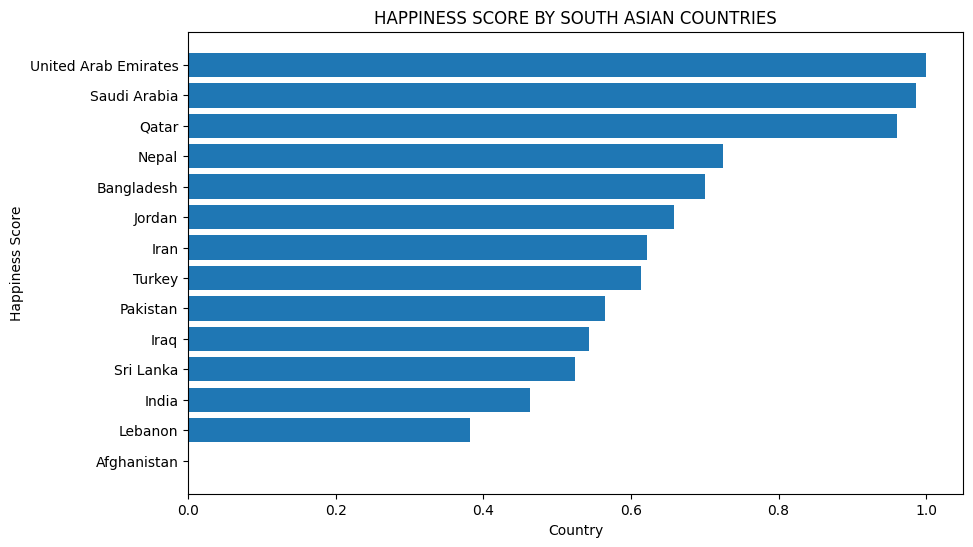

In [42]:
plt.figure(figsize=(10,6))
plt.barh(df['Country'],df['Happiness_Score'])
plt.title("HAPPINESS SCORE BY SOUTH ASIAN COUNTRIES")
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.show()

### **Why does India have such a low Happines_Score?**

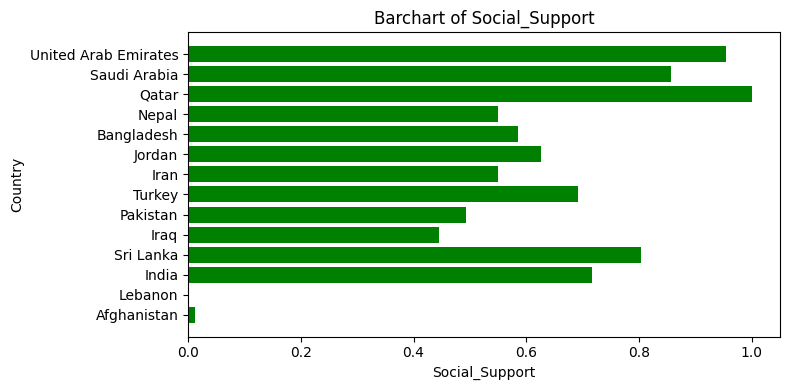

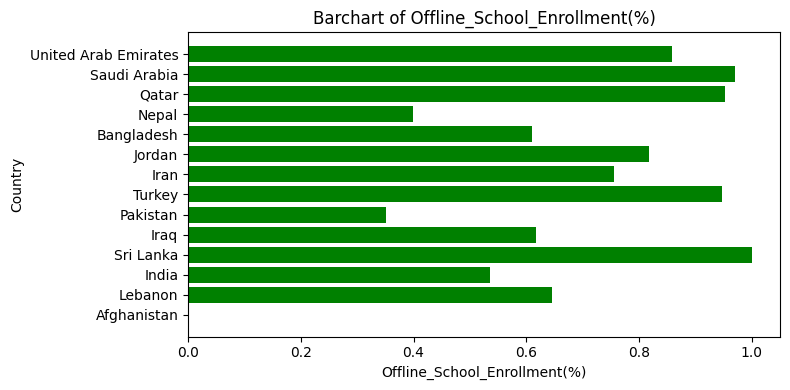

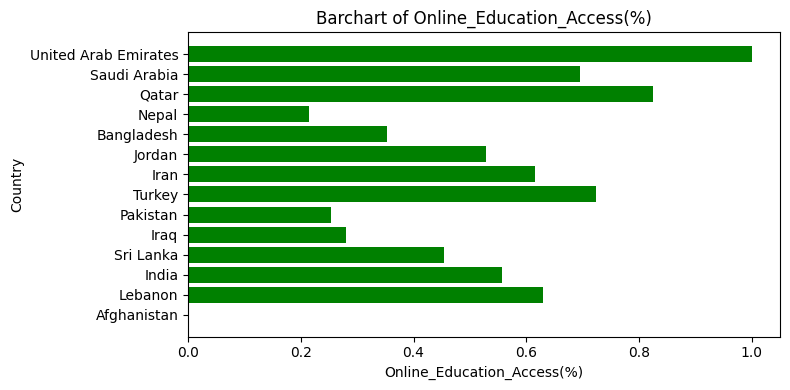

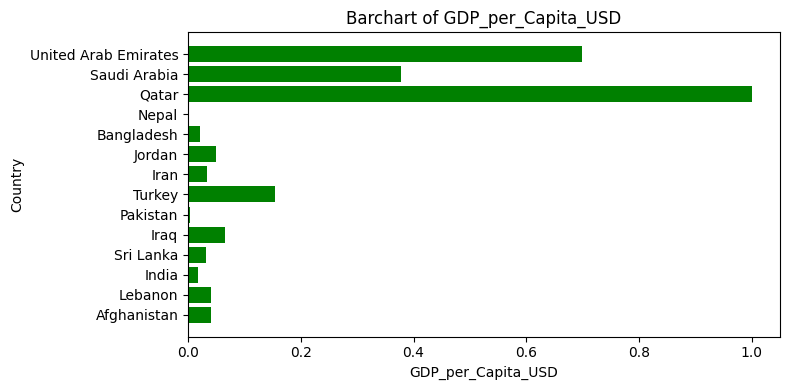

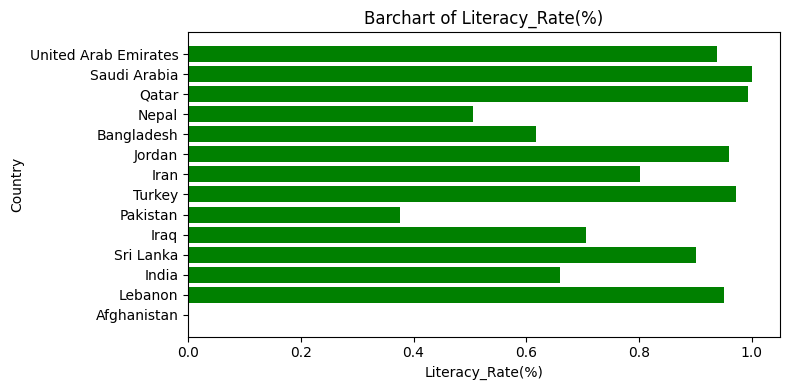

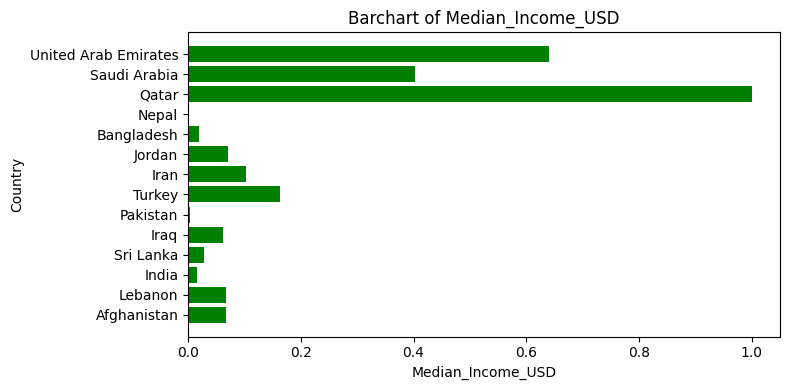

In [43]:
columns = [
    'Social_Support',
    'Offline_School_Enrollment(%)',
    'Online_Education_Access(%)',
    'GDP_per_Capita_USD',
    'Literacy_Rate(%)',
    'Median_Income_USD'
]

for col in columns:
    plt.figure(figsize=(8, 4))
    plt.barh(df['Country'], df[col], color='green')
    plt.title(f"Barchart of {col}")
    plt.xlabel(col)
    plt.ylabel("Country")
    plt.tight_layout()
    plt.show()


In [44]:
X = df.drop('Happiness_Score', axis = 1)
y = df['Happiness_Score']

In [45]:
X.head()

,Country,GDP_per_Capita_USD,Social_Support,Literacy_Rate(%),Offline_School_Enrollment(%),Online_Education_Access(%),Median_Income_USD,Unemployment_Rate(%),Poverty_Rate(%)
5,Afghanistan,0.041504,0.012563,0.000000,0.000000,0.000000,0.066986,0.373770,1.000000
13,Lebanon,0.041504,0.000000,0.950083,0.646388,0.629944,0.066986,1.000000,0.535519
0,India,0.017449,0.716080,0.658902,0.536122,0.556497,0.016587,0.232787,0.338798
4,Sri Lanka,0.032127,0.804020,0.901830,1.000000,0.454802,0.028708,0.173770,0.464481
9,Iraq,0.064742,0.444724,0.705491,0.617871,0.279661,0.062201,0.426230,0.331512


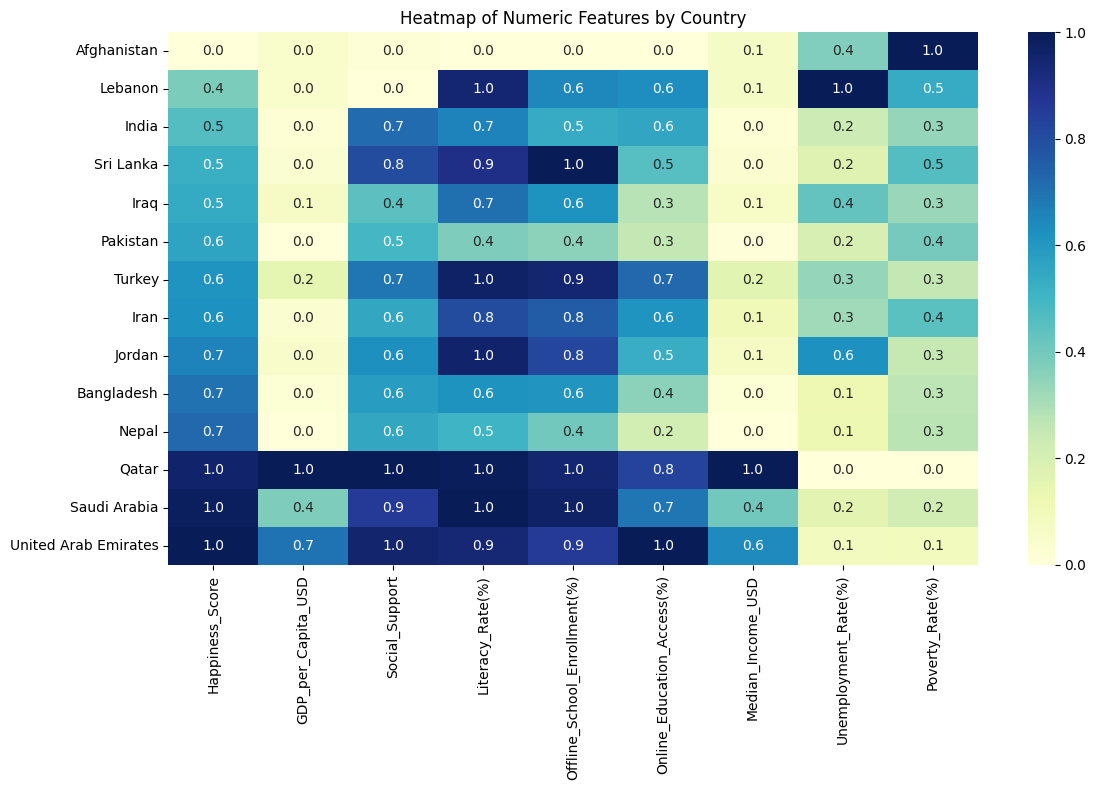

In [46]:
#country = df['Country']
data_for_heatmap = df.iloc[:,1:]

plt.figure(figsize = (12,8))
sns.heatmap(data_for_heatmap, cmap="YlGnBu", annot=True, fmt=".1f", yticklabels = df['Country'])
plt.title("Heatmap of Numeric Features by Country")
plt.tight_layout()
plt.show()

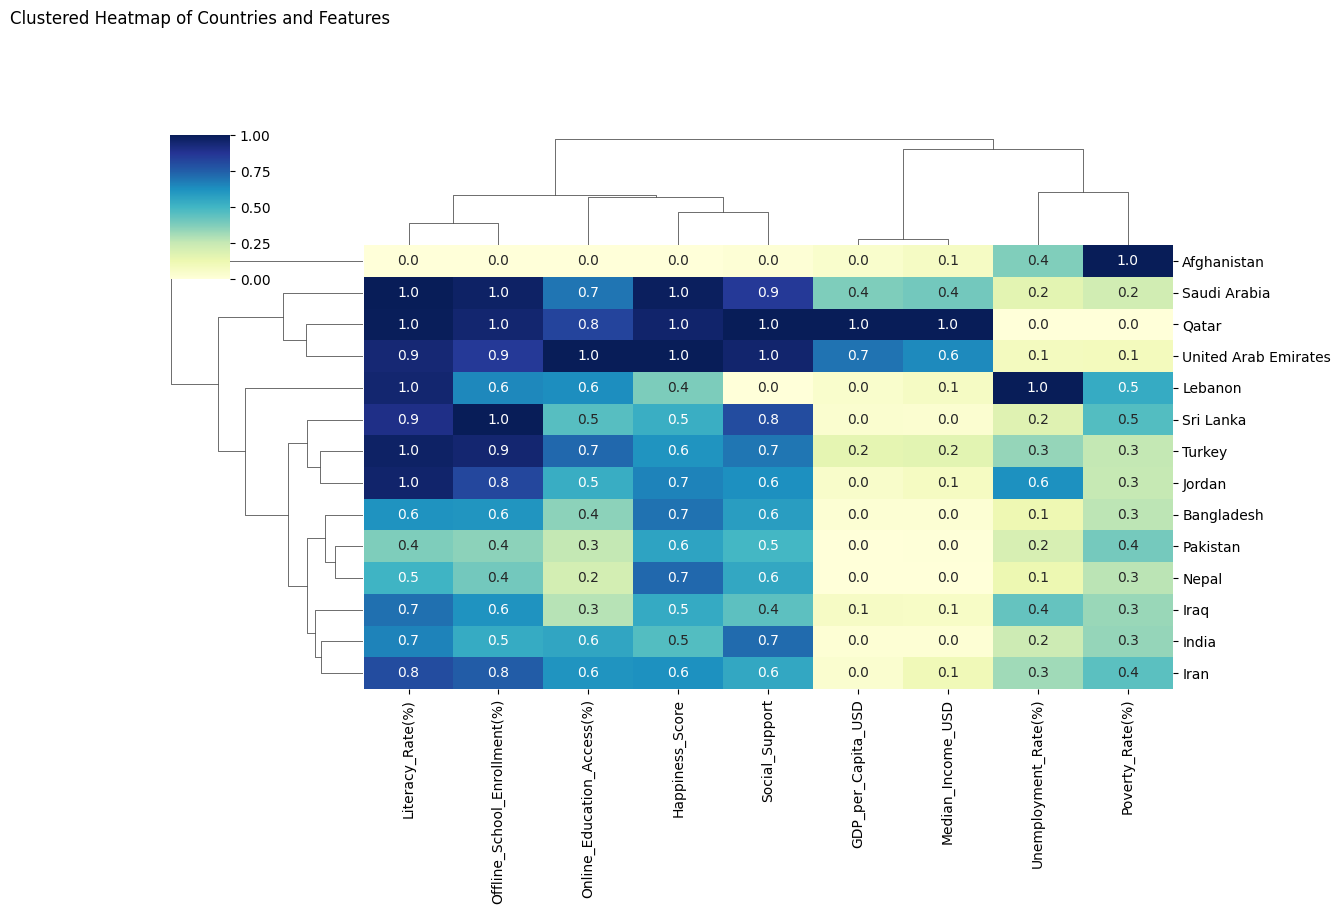

In [47]:
sns.clustermap(data_for_heatmap, cmap="YlGnBu", figsize=(12, 8),
               row_cluster=True, col_cluster=True,
               yticklabels=df['Country'], annot=True, fmt=".1f")
plt.title("Clustered Heatmap of Countries and Features", pad=80)
plt.show()

In [49]:
#Literacy Rate
india_score_literacy_rate = df[df['Country'] == 'India']['Literacy_Rate(%)'].values[0]
literacy_rate_score_lower_than_india = df[df['Literacy_Rate(%)'] < india_score_literacy_rate]
print("1.) COUNTRIES WITH LITERACY RATE(%) LESSER THAN INDIA: \n")
print(literacy_rate_score_lower_than_india['Country'].tolist())

#Offline School Enrollment
india_score_offline_school_enrollment = df[df['Country'] == 'India']['Offline_School_Enrollment(%)'].values[0]
offline_school_enrollment_score_lower_than_india = df[df['Offline_School_Enrollment(%)'] < india_score_offline_school_enrollment]
print("\n2.) COUNTRIES WITH OFFLINE SCHOOL ENROLLMENT(%) LESSER THAN INDIA: \n")
print(offline_school_enrollment_score_lower_than_india['Country'].tolist())

#Online Education Access
india_score_online_education_access = df[df['Country'] == 'India']['Online_Education_Access(%)'].values[0]
online_education_access_score_lower_than_india = df[df['Online_Education_Access(%)'] < india_score_online_education_access]
print("\n3.) COUNTRIES WITH ONLINE SCHOOL ACCESS(%) LESSER THAN INDIA: \n")
print(online_education_access_score_lower_than_india['Country'].tolist())

#Social Support
india_score_social_support = df[df['Country'] == 'India']['Social_Support'].values[0]
social_support_score_lower_than_india = df[df['Social_Support'] < india_score_online_education_access]
print("\n4.) COUNTRIES WITH SOCIAL SUPPORT LESSER THAN INDIA: \n")
print(social_support_score_lower_than_india['Country'].tolist())

#GDP per capita (USD)
india_score_gdp_per_capita_usd = df[df['Country'] == 'India']['GDP_per_Capita_USD'].values[0]
gdp_per_capita_usd_score_lower_than_india = df[df['GDP_per_Capita_USD'] < india_score_gdp_per_capita_usd]
print("\n5.) COUNTRIES WITH GDP PER CAPITA SCORE LESSER THAN INDIA: \n")
print(gdp_per_capita_usd_score_lower_than_india['Country'].tolist())

#Median income per capita (USD)
india_score_median_income_usd = df[df['Country'] == 'India']['Median_Income_USD'].values[0]
median_income_usd_score_lower_than_india = df[df['Median_Income_USD'] < india_score_median_income_usd]
print("\n6.) COUNTRIES WITH MEDIAN INCOME SCORE LESSER THAN INDIA: \n")
print(median_income_usd_score_lower_than_india['Country'].tolist())

#Unemployment rate
india_score_unemployment_rate = df[df['Country'] == 'India']['Unemployment_Rate(%)'].values[0]
unemployment_rate_score_lower_than_india = df[df['Unemployment_Rate(%)'] > india_score_unemployment_rate]
print("\n7.) COUNTRIES WITH UNEMPLOYMENT RATE SCORE GREATER THAN INDIA: \n")
print(unemployment_rate_score_lower_than_india['Country'].tolist())

#Poverty rate
india_score_poverty_rate = df[df['Country'] == 'India']['Poverty_Rate(%)'].values[0]
poverty_rate_score_lower_than_india = df[df['Poverty_Rate(%)'] > india_score_poverty_rate]
print("\n8.) COUNTRIES WITH POVERTY RATE SCORE GREATER THAN INDIA: \n")
print(poverty_rate_score_lower_than_india['Country'].tolist())

1.) COUNTRIES WITH LITERACY RATE(%) LESSER THAN INDIA: 

['Afghanistan', 'Pakistan', 'Bangladesh', 'Nepal']

2.) COUNTRIES WITH OFFLINE SCHOOL ENROLLMENT(%) LESSER THAN INDIA: 

['Afghanistan', 'Pakistan', 'Nepal']

3.) COUNTRIES WITH ONLINE SCHOOL ACCESS(%) LESSER THAN INDIA: 

['Afghanistan', 'Sri Lanka', 'Iraq', 'Pakistan', 'Jordan', 'Bangladesh', 'Nepal']

4.) COUNTRIES WITH SOCIAL SUPPORT LESSER THAN INDIA: 

['Afghanistan', 'Lebanon', 'Iraq', 'Pakistan', 'Iran', 'Nepal']

5.) COUNTRIES WITH GDP PER CAPITA SCORE LESSER THAN INDIA: 

['Pakistan', 'Nepal']

6.) COUNTRIES WITH MEDIAN INCOME SCORE LESSER THAN INDIA: 

['Pakistan', 'Nepal']

7.) COUNTRIES WITH UNEMPLOYMENT RATE SCORE GREATER THAN INDIA: 

['Afghanistan', 'Lebanon', 'Iraq', 'Turkey', 'Iran', 'Jordan']

8.) COUNTRIES WITH POVERTY RATE SCORE GREATER THAN INDIA: 

['Afghanistan', 'Lebanon', 'Sri Lanka', 'Pakistan', 'Iran']


### **CONCLUSION**

***India's socio-economic and education indicators consistently surpass those of countries like Afghanistan, Pakistan, Nepal, Iraq, and Lebanon. Therefore, in comparative indices such as happiness rankings, India deserves to be placed above these nations — and potentially above others like Iran, Sri Lanka, and Jordan depending on context.***